Esse notebook é uma tradução do [artigo](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420) originalmente escrito por [William Koehrsen](https://twitter.com/koehrsen_will) no site [Towards Data Science](https://towardsdatascience.com)

# Um projeto completo de aprendizado de máquina em Python - Parte 1

Ao ler um livro sobre ciência de dados ou fazer um curso, pode parecer que você tem as peças individuais, mas não sabe como colocá-las juntas. Dar o próximo passo e resolver um problema completo de aprendizado de máquina pode ser assustador, mas preservar e concluir um primeiro projeto lhe dará a confiança necessária para resolver qualquer problema de ciência de dados. Esta série de artigos percorrerá uma solução completa de aprendizado de máquina com um conjunto de dados do mundo real para permitir que você veja como todas as peças se encaixam.

Seguiremos o fluxo de trabalho geral de aprendizado de máquina passo a passo: 
1. Limpeza de dados e formatação 
2. Análise exploratória de dados 
3. Engenharia e seleção de recursos 
4. Compare vários modelos de aprendizado de máquina em uma métrica de desempenho 
5. Execute o ajuste de hyperparameter no melhor modelo 
6. Avaliar o melhor modelo no conjunto de testes 
7. Interpretar os resultados do modelo 
8. Tirar conclusões e documentar o trabalho

Ao longo do caminho, veremos como cada etapa flui para a próxima e como implementar especificamente cada parte em Python. O [projeto completo](https://github.com/WillKoehrsen/machine-learning-project-walkthrough) está disponível no GitHub, com o [primeiro notebook aqui](https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb).

# Definição do problema

A primeira etapa antes de iniciar qualquer projeto de Data Science é entender o problema que estamos tentando resolver e os dados disponíveis. Neste projeto, trabalharemos com [dados de energia predial](http://www.nyc.gov/html/gbee/html/plan/ll84_scores.shtml) publicamente disponíveis da cidade de Nova York.

**O objetivo é usar os dados de energia para construir um modelo que possa prever a pontuação Energy Star de um edifício e interpretar os resultados para encontrar os fatores que influenciam a pontuação.**

Os dados incluem o Energy Star Score, que faz desta uma tarefa de aprendizado de máquina de regressão supervisionada:
- **Supervisionado**: temos acesso aos recursos e ao alvo e nosso objetivo é treinar um modelo que possa aprender um mapeamento entre os dois 
- **Regressão**: A pontuação da Energy Star é uma variável contínua

Queremos desenvolver um modelo que seja ao mesmo tempo **preciso** - ele pode prever que o Energy Star Score se aproxima do valor real - e **interpretável** - podemos entender as previsões do modelo. Uma vez que conhecemos o objetivo, podemos usá-lo para guiar nossas decisões à medida que nos aprofundamos nos dados e construímos modelos.

# Limpeza de Dados

Ao contrário do que a maioria dos cursos de ciência de dados gostaria que você acreditasse, nem todos os conjuntos de dados são um grupo de observações perfeitas, sem valores ausentes ou anomalias (por exemplo o [mtcars](http://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) e [iris](https://archive.ics.uci.edu/ml/datasets/iris)). Os dados do mundo real são confusos, o que significa que precisamos [limpá-los e transformá-los](https://www.springboard.com/blog/data-wrangling/) em um formato aceitável antes que possamos iniciar a análise. A limpeza de dados é uma parte não glamourosa, mas necessária, da maioria dos problemas reais da ciência de dados.

Primeiro, podemos carregar os dados como um `DataFrame` do Pandas e dar uma olhada:

In [1]:
import pandas as pd
import numpy as np

# Desabilita os warnings para slice de cópias
pd.options.mode.chained_assignment = None

# Mostra até 60 colunas de um dataframe
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set(font_scale = 2)

# Carrega os dados em um dataframe
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Exibe as 10 primeiras linhas do dataframe
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

Este é um subconjunto dos dados completos que contém 60 colunas. Já podemos ver alguns problemas: primeiro, sabemos que queremos prever a `Pontuação ENERGY STAR`, mas não sabemos o significado de nenhuma das colunas. Embora isso não seja necessariamente um problema - muitas vezes, podemos fazer um modelo preciso sem qualquer conhecimento das variáveis - queremos nos concentrar na interpretabilidade e pode ser importante entender pelo menos algumas das colunas.

Quando eu originalmente recebi a tarefa do start-up, não quis perguntar o que todos os nomes de coluna significavam, então olhei o nome do arquivo `Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_`, e decidi procurar “Lei Local 84”. Isso me levou a [essa página](http://www.nyc.gov/html/gbee/html/plan/ll84.shtml) que explica que essa é uma lei de Nova York exigindo que todos os prédios de um determinado tamanho relatem seu uso de energia. Mais pesquisas me trouxeram para [todas as definições das colunas](http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf). Talvez olhar para um nome de arquivo seja um lugar óbvio para começar, mas para mim isso foi um lembrete para ir devagar, para que você não perca nada importante!

Não precisamos estudar todas as colunas, mas devemos pelo menos entender a Pontuação do Energy Star, que é descrita como:

Um ranking percentil de 1 a 100 com base no uso de energia auto-relatado para o ano de referência. A [pontuação Energy Star](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what) é uma medida relativa usada para comparar a eficiência energética dos edifícios.

Isso elimina o primeiro problema, mas a segunda questão é que os valores ausentes são codificados como "Not Available". Esta é uma string em Python, o que significa que mesmo as colunas com números serão armazenadas como tipos de dados `object`, porque o Pandas converte uma coluna com qualquer string em uma coluna de todas as strings. Podemos ver os tipos de dados das colunas usando o método `dataframe.info()`:

In [2]:
# Exibe o tipo de dado e valores faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

Com certeza, algumas das colunas que claramente contêm números (como ft²), são armazenadas como objetos. Não podemos fazer análises numéricas em strings, então elas precisarão ser convertidas em tipos de dados numéricos (especificamente `float`)!

Aqui está um pequeno código Python que substitui todas as entradas "Not Available" por um "Não-número" (`np.nan`), que pode ser interpretado como números e, em seguida, converte as colunas relevantes para o tipo de dados `float`:

In [3]:
# Substitui todas as ocorrências de Not Available com numpy "not a number"
data = data.replace({'Not Available': np.nan})

# Percorre as colunas
for col in list(data.columns):
    
    # Seleciona as colunas que deveriam ser numéricas    
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        
        # Converte o tipo de dado para float
        data[col] = data[col].astype(float)

Uma vez que as colunas corretas forem números, podemos começar a investigar os dados.

# Dados faltantes e outliers

Além dos tipos de dados incorretos, outro problema comum ao lidar com dados do mundo real é a falta de valores. Estes podem surgir por vários motivos e devem ser preenchidos ou removidos antes de treinarmos um modelo de aprendizado de máquina. Primeiro, vamos ter uma noção de quantos valores ausentes estão em cada coluna (veja o código no [notebook](https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb)).

In [4]:
# Função para calcular os dados faltantes por coluna
def missing_values_table(df):
    
    # Total de dados faltantes
    mis_val = df.isnull().sum()

    # Porcentagem de dados faltantes
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Cria tabela com os resultados
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Renomeia as colunas
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Ordena a tabela pelo percentual
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Exibe as informações
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Retorna o dataframe com os dados faltantes
    return mis_val_table_ren_columns

In [5]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


Embora sempre desejemos ter cuidado com a remoção de informações, se uma coluna tiver uma alta porcentagem de valores ausentes, ela provavelmente não será útil para nosso modelo. O limite para remoção de colunas deve depender do problema ([aqui há uma discussão](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456)) e, para este projeto, removeremos todas as colunas com mais de 50% de valores ausentes.

In [6]:
# Colunas com mais de 50% de dados faltantes
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print("We will remove %d columns." % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [7]:
# Remove as colunas
data = data.drop(columns= list(missing_columns))

In [8]:
missing_values_table(data)

Your selected dataframe has 49 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
Metered Areas (Water),4609,39.2
Water Intensity (All Water Sources) (gal/ft²),3984,33.9
Water Use (All Water Sources) (kgal),3984,33.9
NTA,2263,19.3
Census Tract,2263,19.3
Council District,2263,19.3
Community Board,2263,19.3
Longitude,2263,19.3
Latitude,2263,19.3
ENERGY STAR Score,2104,17.9


# Análise exploratória de dados

Agora que a tediosa - mas necessária - etapa de limpeza de dados está completa, podemos continuar explorando nossos dados! A [Análise Exploratória de Dados](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) é um processo aberto, no qual calculamos estatísticas e criamos figuras para encontrar tendências, anomalias, padrões ou relacionamentos dentro dos dados.

Em suma, o objetivo da EDA é aprender o que nossos dados podem nos dizer. Geralmente começa com uma visão geral de alto nível, depois se estreita em áreas específicas à medida que encontramos partes interessantes dos dados. As descobertas podem ser interessantes por si só, ou podem ser usadas para informar nossas escolhas de modelagem, por exemplo, ajudando-nos a decidir quais recursos usar.

Para começar a EDA, vamos nos concentrar em uma única variável, o **Energy Star Score**, porque esse é o alvo de nossos modelos de aprendizado de máquina. Podemos renomear a coluna para simplificar e, em seguida, começar a explorar esse valor.

# Gráficos de variável única

O objetivo é prever o Energy Star Score (renomeado para `score` em nossos dados), portanto, um ponto razoável para começar é examinar a distribuição dessa variável. Um histograma é uma maneira simples e eficaz de visualizar a distribuição de uma única variável e é fácil de fazer usando o `matplotlib`.

In [9]:
# Renomeia a coluna
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

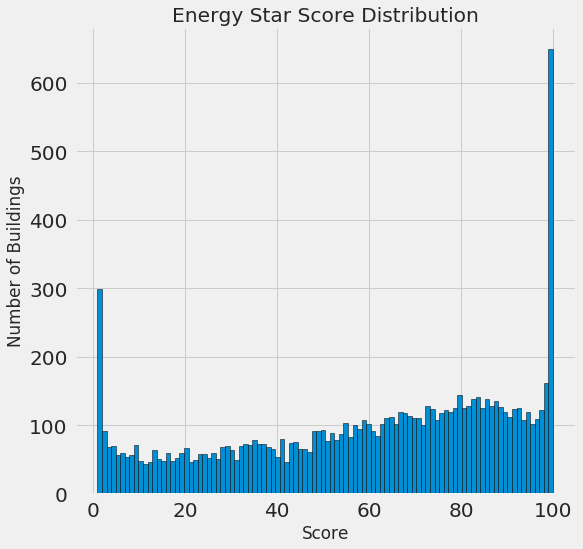

In [10]:
figsize(8,8)

# Histograma da variavel score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')
plt.show()

Isso parece bastante suspeito! A pontuação Energy Star é uma classificação percentil, o que significa que esperamos ver uma distribuição uniforme, com cada pontuação atribuída ao mesmo número de edifícios. No entanto, um número desproporcional de edifícios tem o maior, 100, ou o menor, 1, pontuação (maior é melhor para a pontuação Energy Star).

Se voltarmos à definição da pontuação, vemos que ela é baseada no “uso de energia auto-relatado”, o que pode explicar as pontuações muito altas. Pedir aos proprietários de edifícios que relatem seu próprio uso de energia é como pedir aos alunos que relatem suas próprias pontuações em um teste! Como resultado, essa provavelmente não é a medida mais objetiva da eficiência energética de um edifício.

Se tivéssemos uma quantidade ilimitada de tempo, poderíamos querer investigar por que tantos edifícios têm escores muito altos e muito baixos, o que podíamos selecionando esses edifícios e vendo o que eles têm em comum. No entanto, nosso objetivo é apenas prever a pontuação e não elaborar um método melhor de pontuar edifícios! Podemos notar em nosso relatório que as pontuações têm uma distribuição suspeita, mas nosso principal foco é prever a pontuação.

Para contrastar o Energy Star Score, podemos observar a **Energy Use Intensity (EUI)**, que é o uso total de energia dividido pela metragem quadrada do edifício. Aqui o uso de energia não é auto-relatado, então isso poderia ser uma medida mais objetiva da eficiência energética de um edifício. Além disso, isso não é uma classificação percentual, portanto, os valores absolutos são importantes e esperamos que eles sejam distribuídos normalmente de forma normal, com alguns discrepâncias na extremidade inferior ou superior.


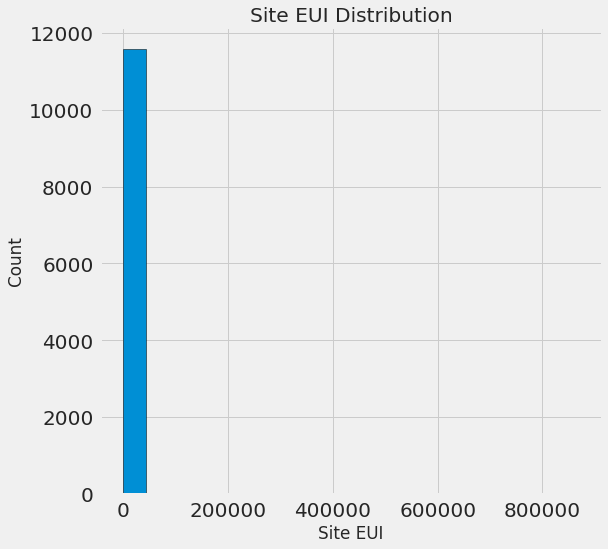

In [11]:
figsize(8, 8)

# Histograma da coluna Site EUI
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')
plt.show()

Bem, isso nos mostra que temos outro problema: **outliers**! O gráfico é incrivelmente distorcido devido à presença de alguns edifícios com pontuações muito altas. Parece que teremos que fazer um ligeiro desvio para lidar com os outliers. Vamos ver as estatísticas desta variável.

In [12]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [13]:
# Remove os valores faltantes, ordena e lista os 10 últimos
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

Uau! Um edifício é claramente muito acima do resto.

In [14]:
# Localiza no dataset a linha que contém o valor destoante
data.loc[data['Site EUI (kBtu/ft²)'] == 869265]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


Pode valer a pena alguém fazer o acompanhamento com o dono deste prédio! No entanto, isso não é problema nosso e só precisamos descobrir como lidar com essas informações. Os [outliers](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm) podem ocorrer por vários motivos: erros de digitação, mau funcionamento dos dispositivos de medição, unidades incorretas ou valores legítimos, mas extremos. Os outliers podem acabar com um modelo porque não são indicativos da distribuição real dos dados.

# Removendo outliers

Quando removemos os valores discrepantes, queremos ter cuidado para que não joguemos fora as medidas só porque parecem estranhas. Eles podem ser o resultado de um fenômeno real que devemos investigar. Para este projeto, removeremos anomalias baseadas na [definição de outliers extremos](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm):
- Abaixo do primeiro quartil - 3 ∗ intervalo interquartil
- Acima do terceiro quartil + 3 ∗ intervalo interquartil

Vamos remover os outliers da variável `Site EUI` e ver como está a distribuição desta variável.

In [15]:
# Calcula o primeiro e terceiro quartil
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartil
iqr = third_quartile - first_quartile

# Remove os outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) & 
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

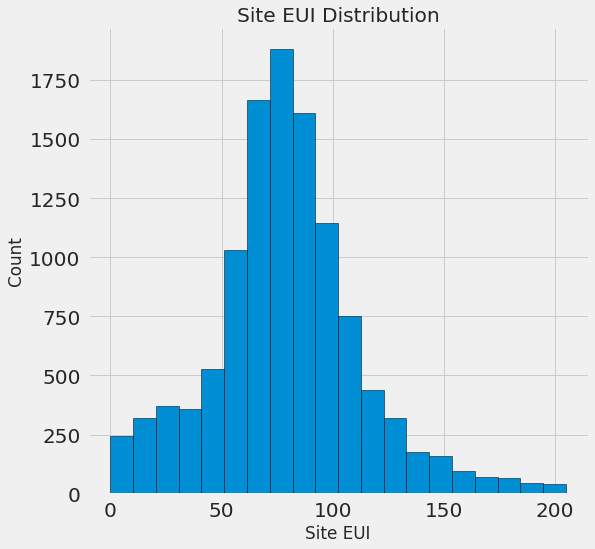

In [16]:
figsize(8, 8)

# Histograma da coluna Site EUI
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')
plt.show()

Depois de remover os outliers, podemos voltar à análise.

Este gráfico parece um pouco menos suspeito e está próximo de ser normalmente distribuído com uma cauda longa no lado direito (ele tem uma inclinação positiva).

Embora isso possa ser uma medida mais objetiva, nosso objetivo ainda é prever a Pontuação do Energy Star, então voltaremos a examinar essa variável. Mesmo que a pontuação não seja uma boa medida, ainda é nossa tarefa predizê-la, e é isso que vamos tentar fazer! No relatório final de volta para a empresa, vou apontar que isso pode não ser uma medida objetiva, e seria uma boa ideia usar métricas diferentes para determinar a eficiência de um edifício. Além disso, se tivéssemos mais tempo para esse projeto, seria interessante dar uma olhada nos prédios com notas de 1 e 100 para ver se eles têm algo em comum.

# Procurando por Relacionamentos

Uma parte importante do EDA é procurar por relacionamentos entre as variáveis e o target (score). As variáveis correlacionadas com o target são úteis para um modelo porque podem ser usadas para prever o target. Uma maneira de examinar o efeito de uma variável categórica (que assume apenas um conjunto limitado de valores) no target é por meio de um gráfico de densidade usando a biblioteca `seaborn`.

Um [gráfico de densidade pode ser considerado como um histograma](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0) suavizado porque mostra a distribuição de uma única variável. Podemos colorir um gráfico de densidade por classe para ver como uma variável categórica altera a distribuição. O código a seguir faz um gráfico de densidade do Energy Star Score colorido pelo tipo de construção (limitado a tipos de construção com mais de 100 pontos de dados):

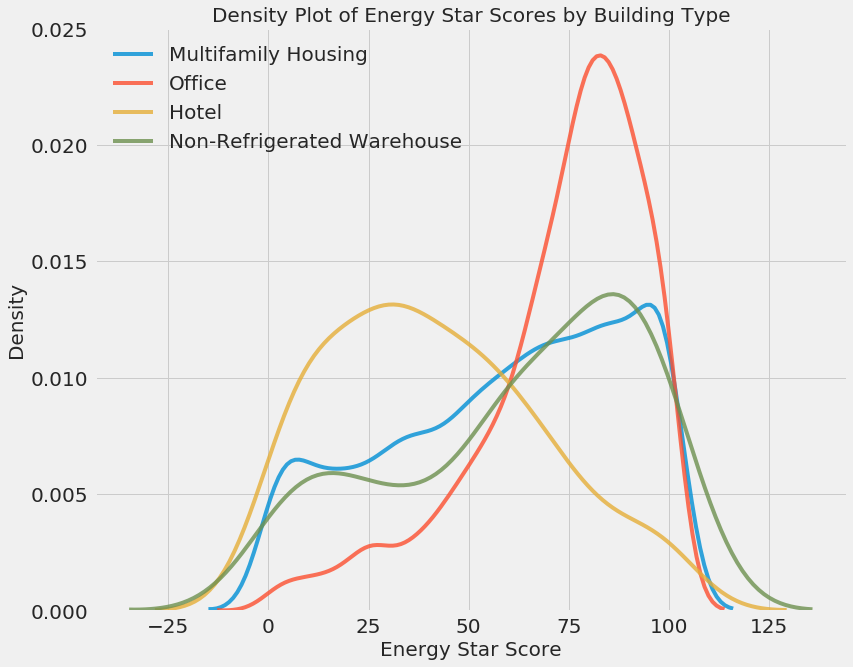

In [17]:
# Cria uma lista de edifícios com mais de 100 ocorrências por tipo
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

# Plota a distribuição do score 
figsize(12, 10)

for b_type in types:
    subset = data[data['Largest Property Use Type'] == b_type]
    
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8)
    
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 20)
plt.show()

Podemos ver que o tipo de edifício tem um impacto significativo no Energy Star Score. Os edifícios **Office** tendem a ter uma pontuação mais alta, enquanto os **hotéis** têm uma pontuação mais baixa. Isso nos diz que devemos incluir o tipo de construção em nossa modelagem porque ela tem um impacto no destino. Como é categórica, teremos que aplicar o `one-hot encode` na variável tipo de construção.

Para examinar outra variável categórica, bairro (borough), podemos fazer o mesmo gráfico, mas dessa vez colorido pelo bairro.

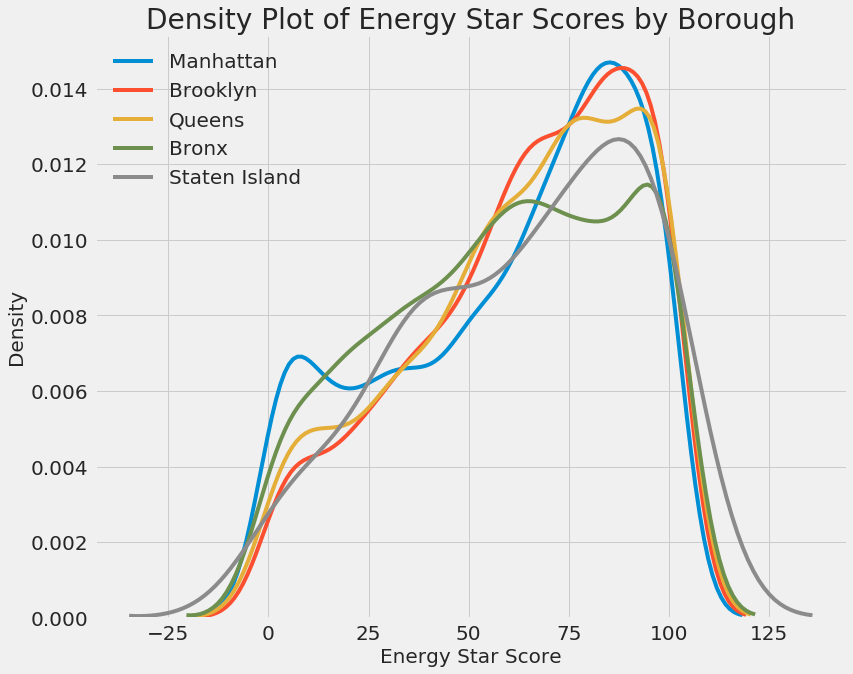

In [18]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Borough', size = 28)
plt.show()

O bairro não parece ter um impacto tão grande na pontuação quanto o tipo de edifício. No entanto, podemos querer incluí-lo em nosso modelo porque existem pequenas diferenças entre os bairros.

# Correlações entre as features e a variável alvo

Para quantificar as relações entre as variáveis, podemos usar o [Coeficiente de Correlação de Pearson](http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/). Esta é uma medida da força e direção de um relacionamento linear entre duas variáveis.

Uma pontuação de +1 é uma relação positiva perfeitamente linear e uma pontuação de -1 é uma relação linear perfeitamente negativa. Vários valores do coeficiente de correlação são mostrados abaixo:

![alt text](https://cdn-images-1.medium.com/max/800/1*5pIn2VmzWxL2mzY8Z433hg.png)

Embora o coeficiente de correlação não possa capturar relacionamentos não lineares, é uma boa maneira de começar a descobrir como as variáveis são relacionadas. No Pandas, podemos calcular facilmente as correlações entre quaisquer colunas em um dataframe:

In [19]:
# Encontre todas as correlações com a variável score e ordena
correlations_data = data.corr()['score'].sort_values()

# Printa as correlações mais negativas
print(correlations_data.head(15))

print()

# Printa as correlações mais positivas
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

Existem várias correlações negativas fortes entre as features e o alvo com as mais negativas as diferentes categorias de EUI (estas medidas variam ligeiramente em como são calculadas). O EUI - Intensidade de uso de energia - é a quantidade de energia usada por um edifício dividido pela metragem quadrada dos edifícios. Destina-se a ser uma medida da eficiência de um edifício com uma pontuação mais baixa sendo melhor. Intuitivamente, essas correlações fazem sentido: à medida que o EUI aumenta, o Energy Star Score tende a diminuir.

Para considerar possíveis relações não-lineares, podemos obter transformações de raiz quadrada e de log natural das features e, em seguida, calcular os coeficientes de correlação com a variável score. Para tentar capturar quaisquer relações possíveis entre o bairro ou o tipo de construção (lembre-se que estas são variáveis categóricas) e a variável score teremos de aplicar o one-hot encode nessas colunas.

No código a seguir, pegamos as transformações de log e raiz quadrada das variáveis numéricas, aplicamos one-hot encode nas duas variáveis categóricas selecionadas (building type e borough), calculamos as correlações entre todos as features e a variável score, e exibimos as top 15 mais positivas e top 15 correlações mais negativas. Isso é muito, mas com os pandas, é fácil fazer cada passo!

In [20]:
# Seleciona as colunas numéricas
numeric_subset = data.select_dtypes('number')

# Cria as colunas com raiz quadrada e log com base nas colunas numéricas
for col in numeric_subset.columns:
    
    # Pula a variável score
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Seleciona as colunas categóricas
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# Aplica o one-hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Unifica os dataframes
# Certifique-se de usar axis = 1 para executar a junção de colunas
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Remove os edifícios que não possuem um score
features = features.dropna(subset = ['score'])

# Procura as correlações entre as variáveis e o score
correlations = features.corr()['score'].dropna().sort_values()

/home/willian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/willian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/home/willian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [21]:
# Exibe as 15 variáveis mais negativamente correlacionadas com o score
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [22]:
# Exibe as 15 variáveis mais positivamente correlacionadas com o score
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

Depois de transformar as features, os relacionamentos mais fortes ainda são aqueles relacionados à Intensidade de uso de energia (EUI). As transformações de log e raiz quadrada não parecem ter resultado em relacionamentos mais fortes. Não há fortes relações lineares positivas, embora nós vejamos que um tipo de edifício Office (Largest Property Use Type_Office) esteja ligeiramente correlacionado positivamente com a pontuação. Essa variável é uma representação on-hot encoded simples das variáveis categóricas para o tipo de construção.

Podemos usar essas correlações para executar a seleção de features (que será visto em breve). Agora, vamos mapear a correlação mais significativa (em termos de valor absoluto) no conjunto de dados que é o Site EUI (kBtu / ft ^ 2). Podemos colorir o gráfico pelo tipo de construção para mostrar como isso afeta o relacionamento.

# Gráficos de duas variáveis

Para visualizar as relações entre duas variáveis contínuas, usamos gráficos de dispersão. Podemos incluir informações adicionais, como uma variável categórica, na cor dos pontos. Também podemos incluir variáveis adicionais usando aspectos como cor dos marcadores ou tamanho dos marcadores. Aqui nós plotaremos duas variáveis numéricas uma contra a outra e usaremos a cor para representar uma terceira variável categórica.

Text(0.5,1,'Energy Star Score vs Site EUI')

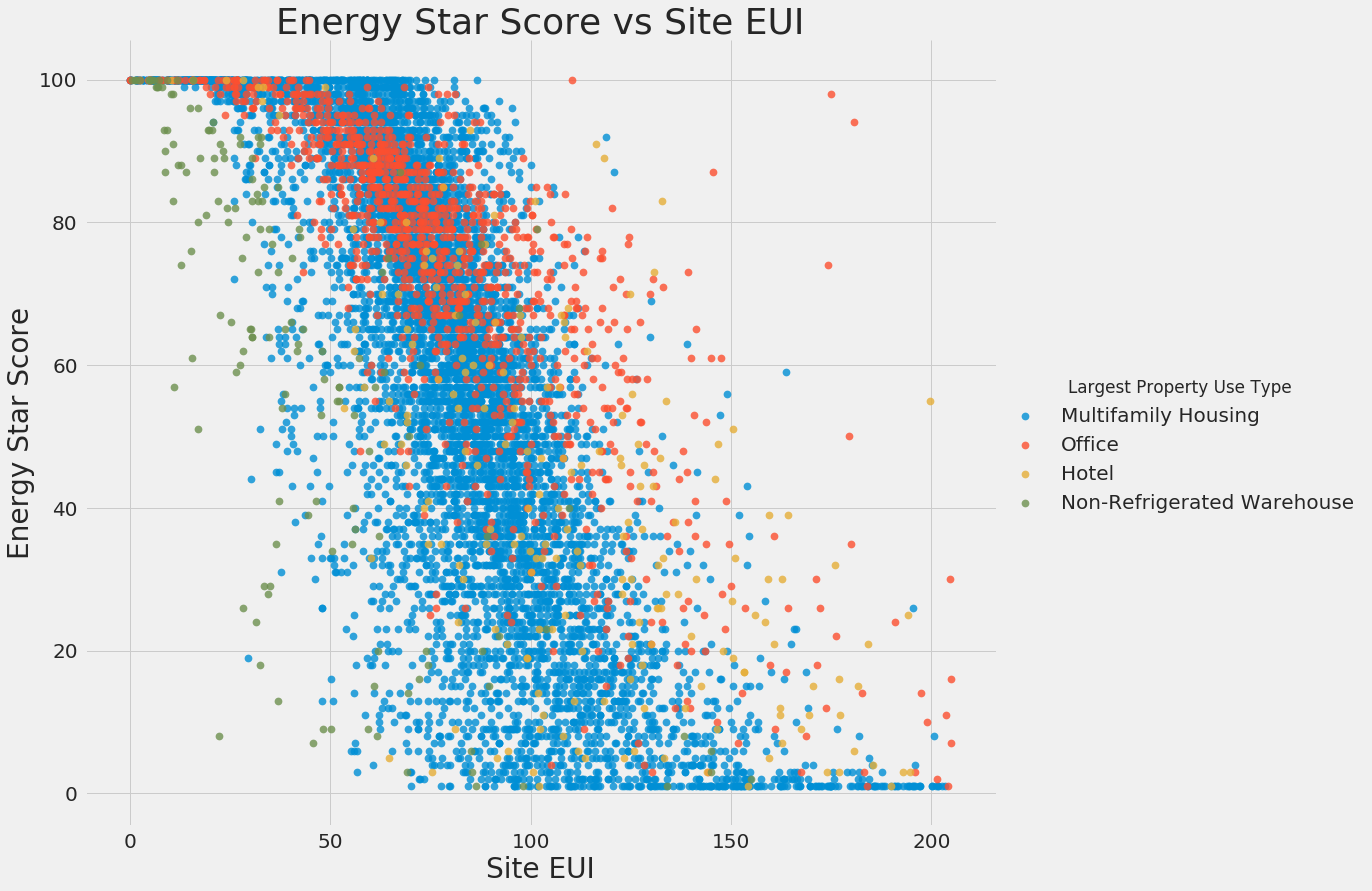

In [23]:
figsize(12, 10)

# Extração dos tipos de edifício
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limitaremos para os edifícios com mais de 100 observações (visto em códigos anteriores)
features = features[features['Largest Property Use Type'].isin(types)]

# Usa o seaborn para plotar o gráfico de dispersão entre Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', hue = 'Largest Property Use Type', 
           data = features, scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2)

plt.xlabel('Site EUI', size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36)

Este gráfico nos permite visualizar como é um coeficiente de correlação de -0.7. À medida que Site EUI diminui, a Energy Star Score aumenta, um relacionamento que se mantém estável entre os tipos de construção. Parece que essa feature será importante para prever o score de um edifício.

A análise exploratória final que vamos fazer é conhecida como o [Pair Plot](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166). Esta é uma ótima ferramenta de exploração porque nos permite ver relacionamentos entre múltiplos pares de variáveis, assim como distribuições de variáveis únicas. Aqui estamos usando a biblioteca de visualização `seaborn` e a função `PairGrid` para criar um gráfico de pares com gráficos de dispersão no triângulo superior, histogramas na diagonal e gráficos de densidade de núcleo 2D e coeficientes de correlação no triângulo inferior.

/home/willian/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/willian/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/willian/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/willian/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/willian/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/willian/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


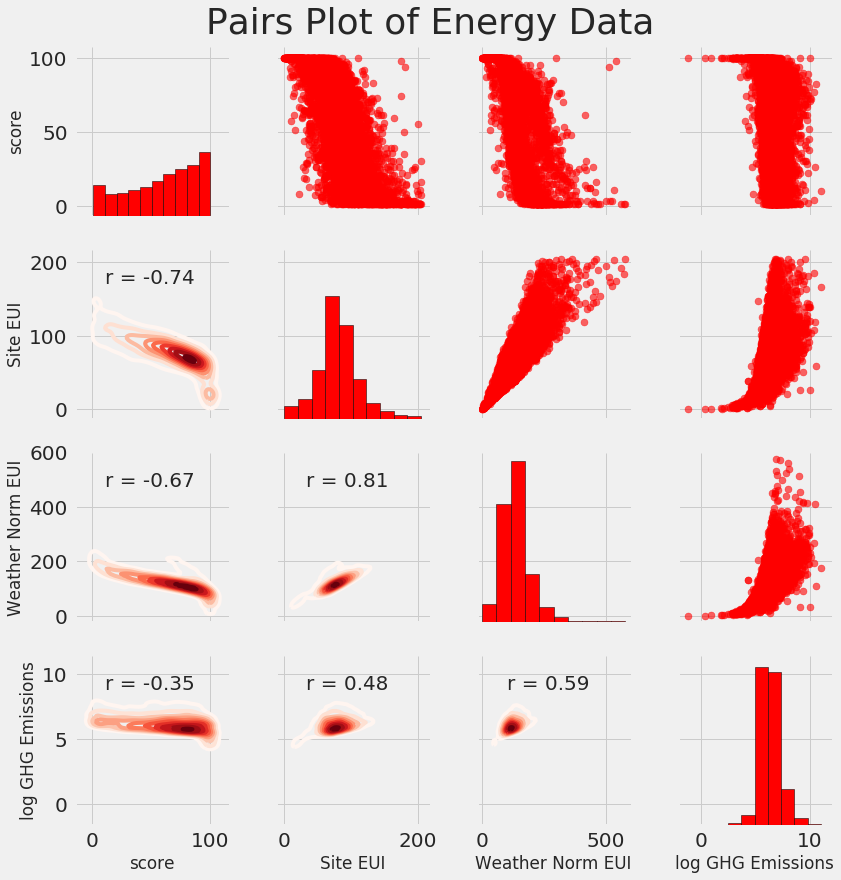

In [24]:
# Extração das colunas para o plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Substitui os valores inf com nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Renomeia as colunas
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Remove os valores faltantes
plot_data = plot_data.dropna()

# Função para calcular o coeficiente de correlação entre duas colunas
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
               xy = (.2, .8), xycoords = ax.transAxes,
               size = 20)
    
# Criar um objeto pairgrid
grid = sns.PairGrid(data = plot_data, size = 3)

# Na parte superior ficam os gráficos de dispersão
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal são os histogramas
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Na parte inferior ficam os gŕaficos de correlação e densidade
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02)
plt.show()

Para ver as interações entre as variáveis, procuramos onde uma linha cruza com uma coluna. Por exemplo, para ver a correlação da variável `Weather Norm EUI` com a variável `score`, analisamos a linha `Weather Norm EUI` e a coluna `score` e vemos um coeficiente de correlação de -0,67. Além de parecer legal, gráficos como esses podem nos ajudar a decidir quais variáveis incluir na modelagem.

# Engenharia e seleção de features

A [engenharia e a seleção de features](https://elitedatascience.com/feature-engineering-best-practices) geralmente oferecem o maior retorno no tempo investido em um problema de aprendizado de máquina. Primeiro de tudo, vamos definir quais são essas duas tarefas:

- [Engenharia de features](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/): o processo de obtenção de dados brutos e extração ou criação de novas features. Isso pode significar fazer transformações de variáveis, como log natural e raiz quadrada, ou aplicar one-hot encode em variáveis categóricas para que possam ser usadas em um modelo. Geralmente, penso na engenharia de features como a criação de features adicionais a partir dos dados brutos.
- [Seleção de recursos](https://machinelearningmastery.com/an-introduction-to-feature-selection/): o processo de escolher as features mais relevantes nos dados. Na seleção de features, removemos features para ajudar o modelo a generalizar melhor os novos dados e criar um modelo mais interpretável. Geralmente, penso na seleção de features como uma remoção de determinadas features, de modo que ficamos apenas com aqueles que são mais importantes.

Um modelo de aprendizado de máquina só pode aprender com os dados que fornecemos, portanto, garantir que os dados incluam todas as informações relevantes para a nossa tarefa é crucial. Se não fornecermos dados corretos a um modelo, então estaremos configurando-o para falhar e não devemos esperar que ele aprenda!

Para este projeto, tomaremos as seguintes etapas de engenharia de features:

- One-hot encode nas variáveis categóricas (borough e property use type)
- Adicionar a transformação de log natural das variáveis numéricas

Aplicar o [one-hot encode](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) é necessário para incluir variáveis categóricas em um modelo. Um algoritmo de aprendizado de máquina não pode entender um tipo de edifício de "Office", então temos que definí-lo como 1 se o prédio for um Office e 0 se não for.

A adição de features transformadas pode ajudar nosso modelo a aprender relacionamentos não lineares nos dados. [Aplicar a raiz quadrada, log natural, ou vários poderes das features](https://datascience.stackexchange.com/questions/21650/feature-transformation-on-input-data) é uma prática comum em ciência de dados e pode ser baseada em conhecimento de domínio ou o que funciona melhor na prática. Aqui nós aplicaremos o log natural em todas as features numéricas.

O código a seguir seleciona as features numéricas, obtém as transformações de log dessas features, seleciona as duas features categóricas, aplica o one-hote encode nessas features e une os dois conjuntos. Isso parece muito trabalho, mas é relativamente simples no Pandas!

In [25]:
# Copia o dataset original
features = data.copy()

# Seleciona as features numéricas
numeric_subset = data.select_dtypes('number')

# Cria as colunas com raiz quadrada e log com base nas colunas numéricas
for col in numeric_subset.columns:
    
    # Pula a variável score
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Seleciona as colunas categóricas
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# Aplica o one-hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Unifica os dataframes
# Certifique-se de usar axis = 1 para executar a junção de colunas
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

/home/willian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/home/willian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


In [26]:
# Printa as dimensões do dataframe (linhas x colunas)
features.shape

(11319, 110)

Após o processo de criação de novas features, temos mais de 11.000 observações (edifícios) com 110 colunas (features). Nem todos essas features são úteis para prever a Pontuação do Energy Star, então agora vamos recorrer à seleção de features para remover algumas das variáveis.

# Seleção de Features

Muitos das 110 features que temos em nossos dados são redundantes porque são altamente correlacionados entre si. Por exemplo, aqui está um gráfico do `Site EUI` vs `Weather Normalized Site EUI`, que tem um coeficiente de correlação de 0,997.

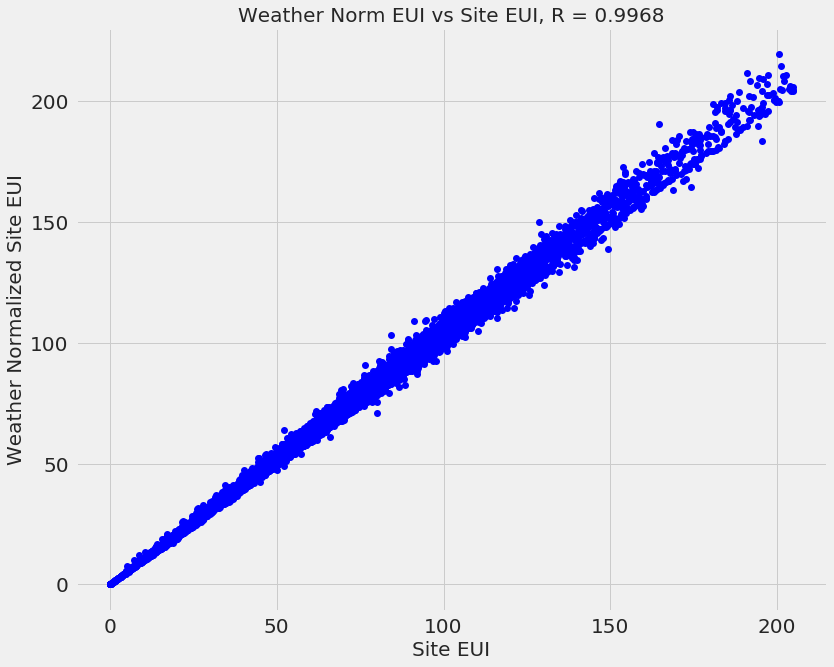

In [27]:
corr = np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)

plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI', size = 20)
plt.ylabel('Weather Normalized Site EUI', size = 20)
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % corr[0][1], size = 20)
plt.show()

Features que são fortemente correlacionadas entre si são conhecidas como [colineares](https://en.wikipedia.org/wiki/Multicollinearity) e a remoção de uma das variáveis nesses pares de features geralmente ajuda um [modelo de aprendizado de máquina a generalizar e a ser mais interpretável](https://www.quora.com/Why-is-multicollinearity-bad-in-laymans-terms-In-feature-selection-for-a-regression-model-intended-for-use-in-prediction-why-is-it-a-bad-thing-to-have-multicollinearity-or-highly-correlated-independent-variables). (Devo salientar que estamos falando de correlações de features com outras features, não de correlações com o target (score), que ajudam nosso modelo!)

Existem vários métodos para calcular a colinearidade entre as features, sendo um dos mais comuns o [fator de inflação de variação](http://www.statisticshowto.com/variance-inflation-factor/). Neste projeto, usaremos o coeficiente de correlação para identificar e remover features colineares. Descartaremos uma das features se o coeficiente de correlação entre elas for maior que 0,6. Para a implementação, dê uma olhada no notebook (e [essa resposta do Stack Overflow](https://stackoverflow.com/a/43104383))


In [28]:
def remove_collinear_features(x, threshold):
    '''
    Objetivo:
        Remover features colineares em um dataframe com um coeficiente de correlação
        maior que o limite (threshold). Remover features colineares pode ajudar um modelo
        generalizar e melhorar a interpretabilidade do modelo.
        
    Enntrada:
        threshold: quaisquer features com correlações maiores que esse valor são removidas
        
    Saída:
        dataframe que contém apenas as features não altamente colineares
    '''
    
    # Não queremos remover correlações com a variável target (score)
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calcula a matriz de correlação
    corr_matrix = x.corr()    
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    # Itera através da matriz de correlação e compara as correlações
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)           
            
            # Se a correlação for maior que o threshold
            if val >= threshold:
                # Exibe as features correlacionadas e o valor da correlação
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                
                # Adiciona o nome da coluna na lista de colunas a serem removidas
                drop_cols.append(col.values[0])
                
    # Remove one entre duas colunas correlacionadas
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Adiciona a variável score novamente no dataset
    x['score'] = y
    
    return x

In [29]:
# Remove as colunas altamente correlacionadas maiores que o limiar
features = remove_collinear_features(features, 0.6)
features.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,log_Direct GHG Emissions (Metric Tons CO2e),log_Water Intensity (All Water Sources) (gal/ft²),log_Longitude,Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,...,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,score
12,15,2637863,NaN,1903,2,100,32.0,7.5,0.0,51.01,NaN,NaN,NaN,NaN,5.015954,3.932022,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93.0
17,20,2777309,NaN,1907,7,100,120.0,8.7,0.9,NaN,NaN,NaN,NaN,NaN,7.968389,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
18,21,2780056,NaN,1939,2,100,76.2,3.5,0.0,18.40,NaN,NaN,NaN,NaN,7.329815,2.912351,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.0
19,22,4988574,179130.0,1939,1,100,75.7,4.0,0.0,NaN,40.857943,-73.934962,12.0,281.0,6.842150,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67.0
20,23,4988569,102150.0,1939,1,100,77.1,2.6,0.0,NaN,40.858256,-73.934734,12.0,281.0,6.377747,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.0


In [30]:
# Remove as colunas com todos os valores vazios (NaN)
features = features.dropna(axis = 1, how = 'all')
features.shape

(11319, 65)

Nosso conjunto de dados final agora possui 64 features (uma das colunas é o target score). Isso ainda é muito pouco, mas é principalmente porque aplicamos o one-hot encode nas variáveis categóricas. Além disso, embora um grande número de features possa ser problemático para modelos como a regressão linear, modelos como a floresta aleatória executam a seleção implícita de recursos e determinam automaticamente quais recursos são importantes durante o treinamento do modelo. Há outras etapas de seleção de features a serem executadas, mas por enquanto manteremos todas as features que temos e veremos como o modelo se comporta.

## Seleção de features adicional

Existem muitos outros métodos para [seleção de features](http://scikit-learn.org/stable/modules/feature_selection.html). Alguns métodos populares incluem a [análise de componentes principais (PCA)](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf), que transforma as features em um número reduzido de dimensões que preservam a maior variação, ou a [análise de componentes independentes (ICA)](http://cs229.stanford.edu/notes/cs229-notes11.pdf), que busca encontrar as fontes independentes em um conjunto de features. No entanto, embora esses métodos sejam eficazes na redução do número de features, eles criam novos features que não têm significado físico e, portanto, tornam quase impossível a interpretação de um modelo.

Esses métodos são muito úteis para lidar com dados de alta dimensão e eu sugeriria [ler mais sobre o tópico](https://machinelearningmastery.com/feature-selection-machine-learning-python/) se você planeja lidar com problemas de aprendizado de máquina!

# Estabelecendo uma base de referência

Agora concluímos a limpeza de dados, a análise exploratória de dados e a engenharia de features. A etapa final a ser tomada antes de começar a modelagem é estabelecer uma linha de base simples. Este é essencialmente um palpite contra o qual podemos comparar nossos resultados. Se os modelos de aprendizado de máquina não vencerem esse palpite, talvez tenhamos que concluir que o aprendizado de máquina não é aceitável para a tarefa ou talvez precisemos tentar uma abordagem diferente.

Para problemas de regressão, uma linha de base simples e ingênua é adivinhar o valor mediano do alvo no conjunto de treinamento para todos os exemplos no conjunto de testes. Isso define uma barra relativamente baixa para qualquer modelo superar.

A métrica que usaremos é [erro absoluto médio (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error) que mede o erro absoluto médio nas previsões. Há muitas métricas para a regressão, mas gosto do [conselho de Andrew Ng](https://www.coursera.org/learn/machine-learning-projects/lecture/wIKkC/single-number-evaluation-metric) para escolher uma única métrica e, depois, para avaliar os modelos. O erro absoluto médio é fácil de calcular e é interpretável.

Antes de calcular a linha de base, precisamos dividir nossos dados em um conjunto de treinamento e um conjunto de teste:

1. O **conjunto de treinamento** de features é o que fornecemos ao nosso modelo durante o treinamento junto com as respostas (saídas). O objetivo é que o modelo aprenda um mapeamento entre as features e o destino (variável alvo).


2. O **conjunto de testes** de features é usado para avaliar o modelo treinado. O modelo não tem permissão para ver as respostas para o conjunto de testes e deve fazer previsões usando apenas as features. Conhecemos as respostas para o conjunto de testes, para que possamos comparar as previsões de teste com as respostas.

In [32]:
# Separa as linhas que contém valor na variável alvo "score" e os que não possuem valor
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


Usaremos 70% dos dados para treinamento e 30% para testes.

In [33]:
# Biblioteca que é usada para divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

# Separa as features e a variável target "score"
features = score.drop(columns = 'score')
targets = pd.DataFrame(score['score'])

# Substitua inf e -inf por nan (requerido para posterior imputação)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Divide o dataset em 70% para treino e 30% para teste
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(6622, 64)
(6622, 1)
(2839, 64)
(2839, 1)


Temos 1858 edifícios sem score, 6622 edifícios com score no conjunto de treinamento e 2839 edifícios com score no conjunto de testes.

Agora podemos calcular o desempenho da linha de base:

In [34]:
# Função para calcular o erro absoluto médio
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print('Baseline Performance on the test set: MAE = %0.4f' % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


A estimativa ingênua está em cerca de 25 pontos no conjunto de testes. A pontuação (score) varia de 1 a 100, então isso representa um erro de 25%, uma barra bastante baixa para ser superada!

# Conclusões

Neste artigo, passamos pelas três primeiras etapas de um problema de aprendizado de máquina. Depois de definir a questão, nós:

1. Limpamos e formatamos os dados brutos
2. Realizamos uma análise de dados exploratória para aprender sobre o conjunto de dados
3. Desenvolvemos um conjunto de features que usaremos para nossos modelos

Finalmente, também completamos o passo crucial de estabelecer uma linha de base com a qual podemos julgar nossos algoritmos de aprendizado de máquina.

Espero que você esteja começando a ter uma ideia de como cada parte do pipeline flui para a próxima: limpar os dados e colocá-los no formato adequado nos permite executar uma análise de dados exploratória. A EDA então informa nossas decisões no estágio de engenharia e seleção de features. Essas três etapas geralmente são executadas nesta ordem, embora possamos voltar mais tarde e fazer mais EDA ou engenharia de features com base em nossos resultados de modelagem. A ciência de dados é um processo interativo no qual estamos sempre procurando maneiras de melhorar nosso trabalho anterior. Isso significa que não precisamos melhorar as coisas da primeira vez (embora possamos dar o melhor de nós), pois quase sempre há oportunidades de revisitar nossas decisões quando sabemos mais sobre o problema.

A segunda parte ([disponível aqui](https://github.com/willsilvano/datascience/blob/master/Towards%20DataScience/Energy%20New%20York%20-%20Part%20Two.ipynb)) mostrará como avaliar os modelos de aprendizado de máquina usando o [Scikit-Learn](http://scikit-learn.org/stable/), selecionar o melhor modelo e executar o ajuste de hiperparâmetros para otimizar o modelo.

Como etapa final, salvaremos os conjuntos de dados que desenvolvemos para usar novamente na próxima parte.

In [35]:
# Salva os dados em arquivos csv para próximas etapas
no_score.to_csv('data/energy_new_york_no_score.csv', index = False)
X.to_csv('data/energy_new_york_training_features.csv', index = False)
y.to_csv('data/energy_new_york_training_labels.csv', index = False)
X_test.to_csv('data/energy_new_york_testing_features.csv', index = False)
y_test.to_csv('data/energy_new_york_testing_labels.csv', index = False)